<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/oneleague_ml_week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Working with Text

**OBJECTIVES**:

- Use clustering algorithms from scikitlearn
- Use clustering on text data to surface similar texts.
- Use different distance metrics to determine clusters.
- Augment `sklearn` clustering algorithms to fit in pipeline

[Material Link](https://drive.google.com/drive/folders/10zBxf2K9kLrUmm1c8stgrmqWymxQKxzB?usp=sharing)

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs, make_moons

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision import datasets
from torchvision import transforms

### KMeans Clustering
 



#### Clustering Basics

- [KMeans Visualization](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)
- [DBSCAN Visualization](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

In [ ]:
X, y = make_blobs(random_state=22)

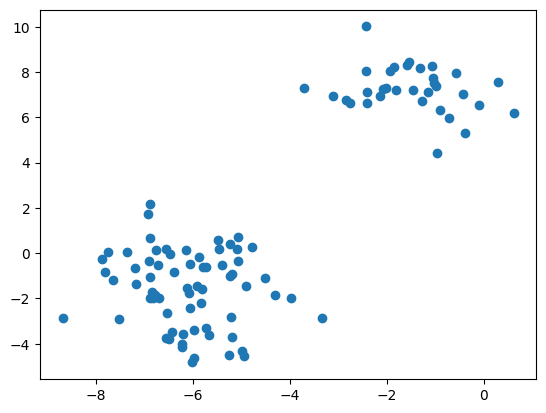

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

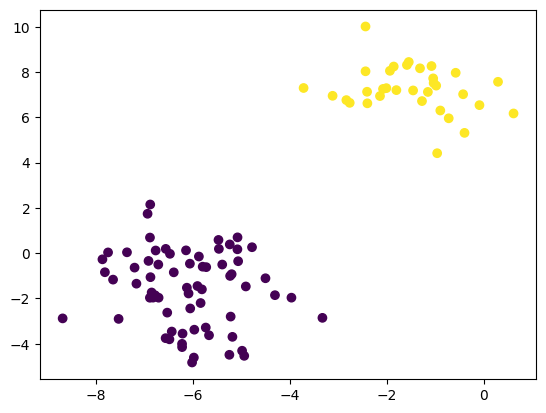

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)

In [9]:
pipe = Pipeline([('scale', StandardScaler()),
                 ('cluster', KMeans(2))])

In [10]:
pipe.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scale', StandardScaler()), ('cluster', KMeans(n_clusters=2))])

In [11]:
pipe.predict(X)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int32)

In [12]:
pipe.score(X)

-28.341856954777768

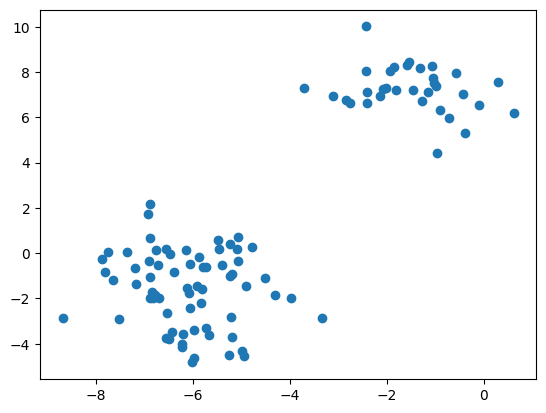

In [13]:
X, y = make_blobs(centers=3, random_state = 22)
plt.scatter(X[:, 0], X[:, 1])

In [14]:
X, y = make_blobs(centers=3)
scores = []
for centers in range(2, 10):
  pipe = Pipeline([('scale', StandardScaler()),
                 ('cluster', KMeans(centers))])
  pipe.fit(X)
  scores.append(pipe.score(X))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

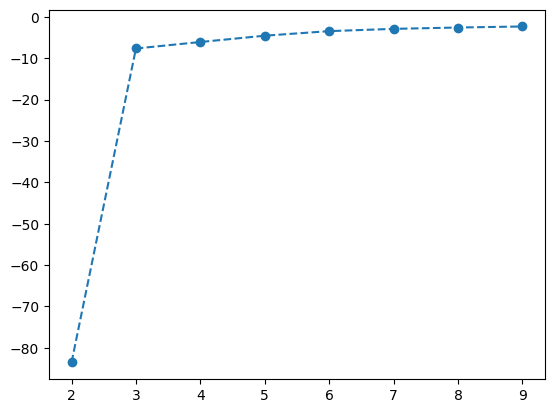

In [15]:
plt.plot(range(2, 10), scores, '--o')

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
silhouette_score(X, pipe.predict(X))

0.36354568228490103

In [19]:
X, y = make_blobs(centers=3)
scores = []
for centers in range(2, 10):
  pipe = Pipeline([('scale', StandardScaler()),
                 ('cluster', KMeans(centers))])
  pipe.fit(X)
  scores.append(silhouette_score(X, pipe.predict(X)))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

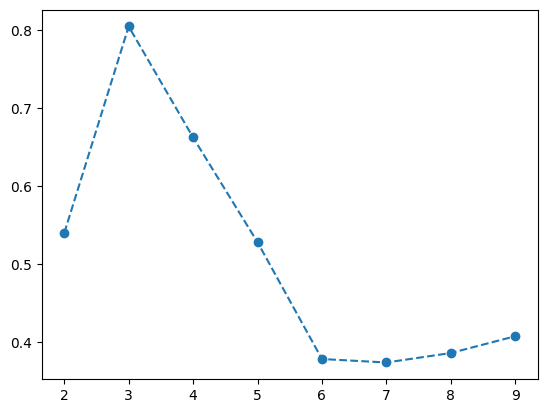

In [20]:
plt.plot(range(2, 10), scores, '--o')

### Problem Customer Segmentation

Can you find meaningful groupings of the customers using clustering?

- [Data Source](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/marketing_campaign.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.dropna(inplace=True)

In [29]:
scores = []
for centers in range(2, 10):
  pipe = Pipeline([('scale', StandardScaler()),
                 ('cluster', KMeans(centers))])
  pipe.fit(newdf)
  scores.append(pipe.score(newdf))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

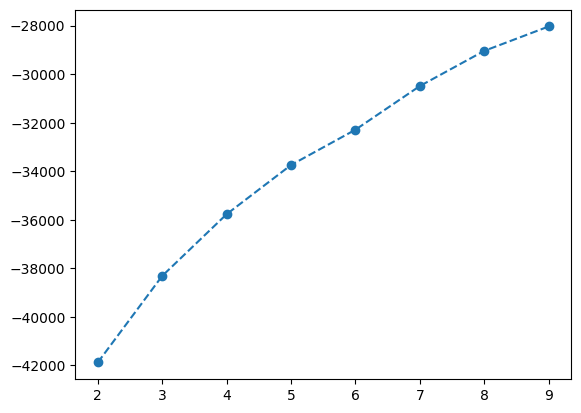

In [30]:
plt.plot(range(2, 10), scores, '--o')

In [34]:
newdf['label'] = pipe.predict(newdf)

In [38]:
newdf.groupby('label')[['Income', 'Kidhome']].mean()

,Income,Kidhome
label,,
0,40681.384615,0.598291
1,59190.353712,0.205240
2,72513.835979,0.044974
3,29669.469548,0.850688
4,81243.587719,0.052632
5,71054.833333,0.066667
6,87659.298851,0.057471
7,42687.557769,0.673307
8,45242.285714,0.666667


### Representing Text: CountVectorizer

In [39]:
#use newsgroups data
from sklearn.datasets import fetch_20newsgroups

In [40]:
news = fetch_20newsgroups(categories = ['rec.sport.baseball', 'rec.sport.hockey', 'rec.motorcycles', 'rec.autos'])

In [41]:
X = news.data

In [42]:
print(X[0])

From: swdwan@napier.uwaterloo.ca (Donald Wan)
Subject: $ 80 SVX OIL CHANGE
 
Organization: University of Waterloo
Lines: 17





 My friend brought a subaru SVX recently.  I had drove it for couples times and I
think its a great car, esp on snow.  However when she took it to a local Subaru
dealer for a oil change, the bill came out to be about 80 dollars.  The dealer
told us it is because to change the oil filter on a SVX it is necessary to
disassemble a metal cover under the engine and that took an hour of labour.
At first, we think we are being ripped off so she phone to a dealer in Toronto
but found out the they are charging roughly the same price.  So is there any
SVX owner out there that has the same problem ?  And if the oil change story is
true, then the engineer of Subaru looks pretty stubid to me. By the way, the car
looks great.

SWD Wan.




In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
text = "My friend brought a subaru SVX recently"
text.split()

['My', 'friend', 'brought', 'a', 'subaru', 'SVX', 'recently']

In [49]:
cvect = CountVectorizer(max_features=500)

In [50]:
X_vect = cvect.fit_transform(X)

In [51]:
X_vect

<2389x500 sparse matrix of type '<class 'numpy.int64'>'
	with 165367 stored elements in Compressed Sparse Row format>

In [52]:
pd.DataFrame(X_vect.todense(), columns = cvect.get_feature_names_out())

,00,000,02,03,10,100,11,12,13,14,...,would,writes,wrong,year,years,yes,york,you,young,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,19,0,19,15,12,10,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,4,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,0,0,0,0,0,0,1,1,0,0,...,1,2,0,0,0,0,0,3,0,1
2385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2386,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2387,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
#custom class for pipeline
class KMClusters(BaseEstimator, TransformerMixin):
    
    def __init__(self, k = 4):
        self.k = k
        self.model = KMeans(n_clusters = self.k, random_state = 22)
        
    def fit(self, documents, labels = None):
        return self
    
    def transform(self, documents):
        return self.model.fit_predict(documents)

In [54]:
#X = ...
X = news.data

In [55]:
#instantiate
kmc = KMClusters()

In [56]:
#fit it
kmc.fit(X)

KMClusters()

In [57]:
#get labels with .transform()
kmc.transform(X)

ValueError: ignored

### Using a Pipeline

Now, we get our `KMClusters` in a pipeline that vectorizes the texts and passes through the clusterer.

In [58]:
#bring in pipeline and vectorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [59]:
#make the pipeline
pipe = make_pipeline(CountVectorizer(stop_words='english', max_features = 500), StandardScaler(with_mean = False), KMClusters())

In [60]:
#fit the pipe
pipe.fit(X)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=500, stop_words='english')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('kmclusters', KMClusters())])

In [61]:
#get the labels
labels = pipe.transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([   1,   72,    1, 2315]))

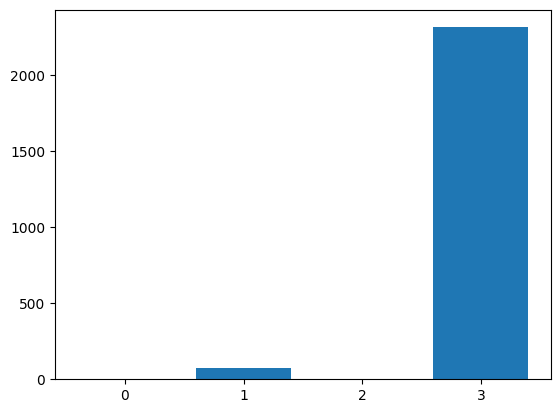

In [63]:
#look at the class representation
counts = np.unique(labels, return_counts=True)
plt.bar(counts[0], counts[1])
plt.xticks([0, 1, 2, 3]);

### The NLTK Cluster Module

*Advantages*: Here we can make use of the `cosine_distance` which can be more effective for clustering texts.

In [64]:
#import the clusterer and distance metric
from nltk.cluster import KMeansClusterer, cosine_distance

In [65]:
#write our new custom nltk class
class KMeansClustersNLTK(BaseEstimator, TransformerMixin):
    
    def __init__(self, k = 4):
        
        self.k = k
        self.distance = cosine_distance
        self.model = KMeansClusterer(num_means = self.k, distance = self.distance, avoid_empty_clusters=True)
    
    def fit(self, documents, labels = None):
        return self
    
    def transform(self, documents):
        return self.model.cluster(documents.toarray(), assign_clusters = True)

In [66]:
#new pipe
pipe2 = make_pipeline(CountVectorizer(stop_words='english'), KMeansClustersNLTK())

In [67]:
#fit it
pipe2.fit(X)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('kmeansclustersnltk', KMeansClustersNLTK())])

In [68]:
#extract labels
labels2 = pipe2.transform(X)

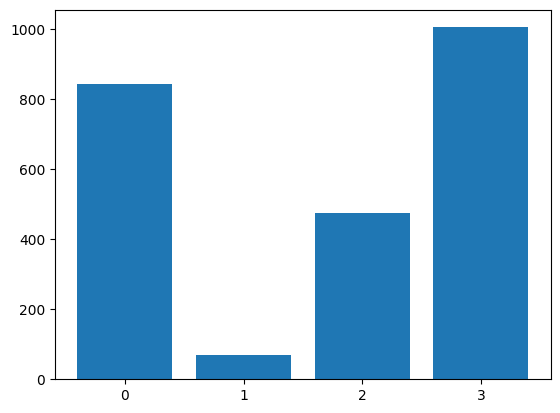

In [69]:
#plot the results
counts2 = np.unique(labels2, return_counts=True)
plt.bar(counts2[0], counts2[1])
plt.xticks([0, 1, 2, 3]);

In [70]:
print(X[0])

From: swdwan@napier.uwaterloo.ca (Donald Wan)
Subject: $ 80 SVX OIL CHANGE
 
Organization: University of Waterloo
Lines: 17





 My friend brought a subaru SVX recently.  I had drove it for couples times and I
think its a great car, esp on snow.  However when she took it to a local Subaru
dealer for a oil change, the bill came out to be about 80 dollars.  The dealer
told us it is because to change the oil filter on a SVX it is necessary to
disassemble a metal cover under the engine and that took an hour of labour.
At first, we think we are being ripped off so she phone to a dealer in Toronto
but found out the they are charging roughly the same price.  So is there any
SVX owner out there that has the same problem ?  And if the oil change story is
true, then the engineer of Subaru looks pretty stubid to me. By the way, the car
looks great.

SWD Wan.




In [71]:
#there is a subject line
X[0].split('\n')[1]

'Subject: $ 80 SVX OIL CHANGE'

In [78]:
#make a news dataframe
newsdf = pd.DataFrame(X)

newsdf.head()

#add column label
newsdf.columns = ['text']

#add label column
newsdf['labels'] = labels2

def grab_subject(text):
    """
    (str) -> (str)
    Returns the subject line of an email
    """
    subject = [line for line in text.split('\n') if line.startswith('Subject')]
    return subject[0]

newsdf['subjects'] = newsdf['text'].apply(grab_subject)
groups.head(3)[['labels', 'subjects']].sort_values(by = 'labels')

,labels,subjects
0,0,Subject: $ 80 SVX OIL CHANGE
2,0,Subject: Re: Saturn 91-92 Manual Transmission ...
4,0,Subject: ERA formula
1,1,"Subject: NHL Swedes: Stats, April 5"
44,1,Subject: Re: Playoff predictions
84,1,Subject: Re: Playoff predictions
12,2,Subject: minnesota scene
19,2,Subject: Re: Bay area media (Wings-Leafs cover...
21,2,Subject: Re: WARNING.....(please read)...
3,3,Subject: Re: When Is Melido Due Back?


In [74]:
#make a function to grab subjects
#look for structure; use .split() and consistent structures from data! (EVERYTHING STARTS WITH SUBJECT)
newsdf['text'].apply(grab_subject)

0                            Subject: $ 80 SVX OIL CHANGE
1                     Subject: NHL Swedes: Stats, April 5
2       Subject: Re: Saturn 91-92 Manual Transmission ...
3                   Subject: Re: When Is Melido Due Back?
4                                    Subject: ERA formula
                              ...                        
2384                       Subject: Re: Tools Tools Tools
2385    Subject: Bosox win again! (the team record is ...
2386                       Subject: Hot, Cold Streaks ???
2387                                 Subject: Bike advice
2388                          Subject: TIGER STADIUM GIF?
Name: text, Length: 2389, dtype: object

In [75]:
#extract subjects as new column
newsdf['subjects'] = newsdf['text'].apply(grab_subject)

In [76]:
#group by the labels
groups = newsdf.groupby('labels')

In [ ]:
# for group in groups:
#     print(group[0], group[1])

In [77]:
#examine the first two results from each group
groups.head(3)[['labels', 'subjects']].sort_values(by = 'labels')

,labels,subjects
0,0,Subject: $ 80 SVX OIL CHANGE
2,0,Subject: Re: Saturn 91-92 Manual Transmission ...
4,0,Subject: ERA formula
1,1,"Subject: NHL Swedes: Stats, April 5"
44,1,Subject: Re: Playoff predictions
84,1,Subject: Re: Playoff predictions
12,2,Subject: minnesota scene
19,2,Subject: Re: Bay area media (Wings-Leafs cover...
21,2,Subject: Re: WARNING.....(please read)...
3,3,Subject: Re: When Is Melido Due Back?


### COVID Example

- [Source](https://www.kaggle.com/code/wonduk/text-clustering-pca-eda-on-covid19-dataset/input?select=Corona_NLP_test.csv)

In [ ]:
df = pd.read_csv('Corona_NLP_test.csv')

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
